In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns  #for attractive graph
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf #numerical computation
import keras #deep learning library
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential

# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\huzai\anaconda3\Lib\site-packages\keras\preprocessing\image\__init__.py)

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Model, Sequential


In [23]:
path = pathlib.Path(r"C:\Users\huzai\OneDrive\Desktop\Huzaifa Sem 6\Deep Learning\Project\kvasir-dataset-v2")

In [24]:
dyed_ifted_polyps = list(path.glob('dyed-lifted-polyps/*'))    #for finding directories
dyed_resection_margins = list(path.glob('dyed-resection-margins/*'))
esophagitis = list(path.glob('esophagitis/*'))
normal_cecum = list(path.glob('normal-cecum/*'))
normal_pylorus = list(path.glob('normal-pylorus/*'))
normal_z_line = list(path.glob('normal-z-line/*'))
polyps = list(path.glob('polyps/*'))
ulcerative_colitis = list(path.glob('ulcerative-colitis/*'))

In [34]:
print(dyed_resection_margins)

[WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/003808ff-c349-481a-9c91-e9acf1c181b7.jpg'), WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/0062bbf3-58d7-435d-b0ca-381703c39911.jpg'), WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/009bd044-4a5a-4c81-b481-d20fb223cd81.jpg'), WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/00adb051-3e76-4482-b0e5-5207a028470b.jpg'), WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/01086b46-817d-4f20-8aba-4a7b9347ab1c.jpg'), WindowsPath('C:/Users/huzai/OneDrive/Desktop/Huzaifa Sem 6/Deep Learning/Project/kvasir-dataset-v2/dyed-resection-margins/016cc0c1-2a9e-464c-884f-0997561f7dde.jpg'), Win

In [25]:
data = {
    'dyed-lifted-polyps' : dyed_ifted_polyps ,
    'dyed-resection-margins' : dyed_resection_margins,
    'esophagitis' : esophagitis,
    'normal-cecum' : normal_cecum,
    'normal-pylorus' : normal_pylorus,
    'normal-z-line' : normal_z_line,
    'polyps' : polyps,
    'ulcerative-colitis' : ulcerative_colitis
}

polys_labels = {
    0:'dyed-lifted-polyps',
    1:'dyed-resection-margins',
    2:'esophagitis',
    3:'normal-cecum',
    4:'normal-pylorus',
    5:'normal-z-line',
    6:'polyps',
    7:'ulcerative-colitis'
}

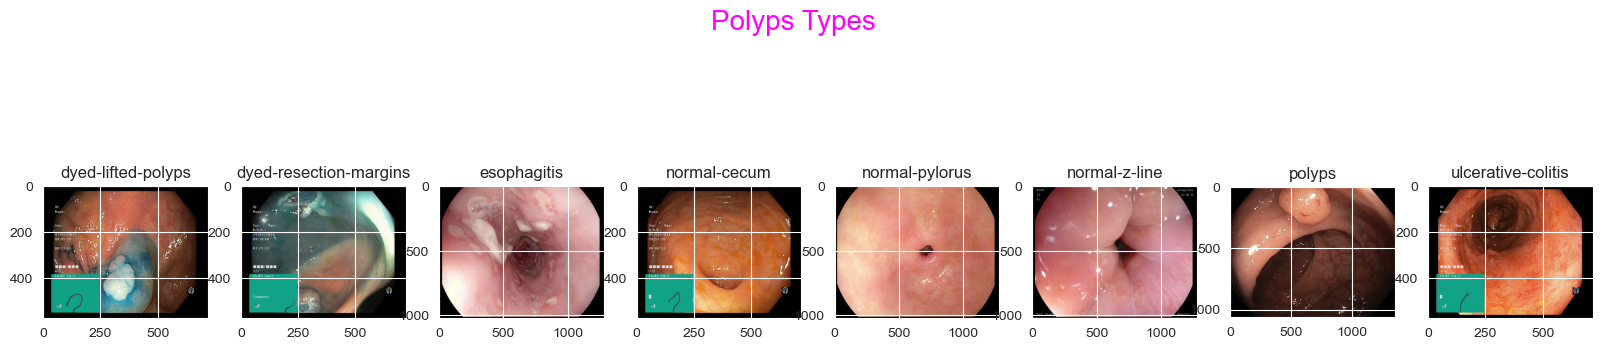

In [26]:
fig , ax = plt.subplots(ncols=8 , figsize=(20,5))

fig.suptitle ('Polyps Types', color='magenta', fontsize = 20)

dyed_ifted_polyps_img = img.imread(dyed_ifted_polyps[0])  #after training data image picked

dyed_resection_margins_img = img.imread(dyed_resection_margins[0])

esophagitis_img = img.imread(esophagitis[0])

normal_cecum_img = img.imread(normal_cecum[0])

normal_pylorus_img = img.imread(normal_pylorus[0])

normal_z_line_img = img.imread(normal_z_line[0])

polyps_img = img.imread(polyps[0])

ulcerative_colitis_img = img.imread(ulcerative_colitis[0])

ulcerative_colitis_img = img.imread(ulcerative_colitis[0])
for index,name in enumerate(list(data.keys())):
    
    ax[index].set_title(name)
    
ax[0].imshow(dyed_ifted_polyps_img)

ax[1].imshow(dyed_resection_margins_img)

ax[2].imshow(esophagitis_img)

ax[3].imshow(normal_cecum_img)

ax[4].imshow(normal_pylorus_img)

ax[5].imshow(normal_z_line_img)

ax[6].imshow(polyps_img)

ax[7].imshow(ulcerative_colitis_img)

In [28]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory(r"C:\Users\huzai\OneDrive\Desktop\Huzaifa Sem 6\Deep Learning\Project\kvasir-dataset-v2",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data =train_gen.flow_from_directory(r"C:\Users\huzai\OneDrive\Desktop\Huzaifa Sem 6\Deep Learning\Project\kvasir-dataset-v2",target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [29]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) #layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))  #layer 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) #layer
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu')) #layer
model.add(keras.layers.Dropout(0.2)) #dropout: prevent overfitting
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(units=8,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,159,208 (23.50 MB)

 Trainable params: 6,159,208 (23.50 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [32]:
history=model.fit(train_data,epochs=50,valiedation_data=test_data,shuffle=True)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.4071 - loss: 1.3558 - val_accuracy: 0.6469 - val_loss: 0.7396
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.6704 - loss: 0.7225 - val_accuracy: 0.7050 - val_loss: 0.6570
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7154 - loss: 0.6123 - val_accuracy: 0.7063 - val_loss: 0.6899
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.7740 - loss: 0.5200 - val_accuracy: 0.6525 - val_loss: 0.7830
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.8105 - loss: 0.4175 - val_accuracy: 0.6875 - val_loss: 0.7890
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8694 - loss: 0.3263 - val_accuracy: 0.6938 - val_loss: 0.8728
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.8886 - loss: 0.2746 - val_accuracy: 0.6988 - val_loss: 1.0099
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9337 - loss: 0.1875 - val_accu

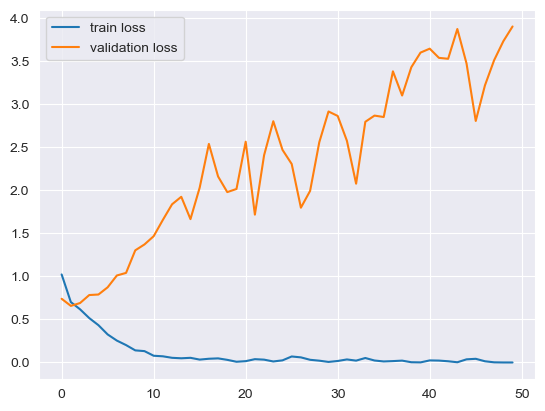

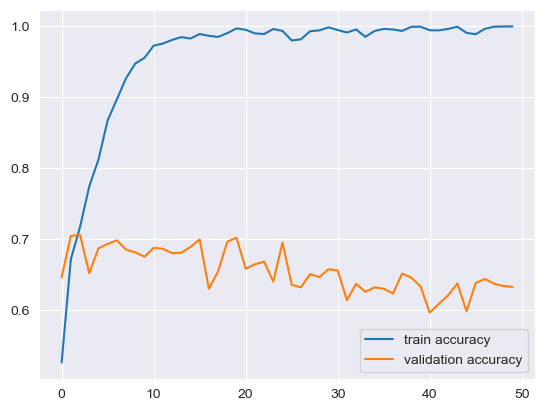

In [33]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()